In [442]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [443]:
customers = pd.read_csv('./marketing_campaign.csv', sep='\t')
customers.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [444]:
customers.drop('ID', axis=1, inplace=True)
customers.shape

(2240, 28)

In [445]:
customers.dtypes

Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [446]:
import datetime

currentYear = datetime.datetime.now().year

customers = customers.rename(columns={'Year_Birth': 'Age'})
customers['Age'] = customers['Age'].map(lambda year_Birth: currentYear-year_Birth)
customers

,Age,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,65,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,68,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,57,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,38,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,41,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,55,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,...,5,0,0,0,0,0,0,3,11,0
2236,76,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,...,7,0,0,0,1,0,0,3,11,0
2237,41,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,6,0,1,0,0,0,0,3,11,0
2238,66,Master,Together,69245.0,0,1,24-01-2014,8,428,30,...,3,0,0,0,0,0,0,3,11,0


In [447]:
educationLevels = customers['Education'].unique().tolist()
educationLevels.sort()
educationLevels

['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD']

In [448]:
customers = customers.rename(columns={'Education': 'Education_level'})
customers['Education_level'] = customers['Education_level'].map(
  lambda level: educationLevels.index(level)
)
customers

,Age,Education_level,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,65,2,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,68,2,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,57,2,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,38,2,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,41,4,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,55,2,Married,61223.0,0,1,13-06-2013,46,709,43,...,5,0,0,0,0,0,0,3,11,0
2236,76,4,Together,64014.0,2,1,10-06-2014,56,406,0,...,7,0,0,0,1,0,0,3,11,0
2237,41,2,Divorced,56981.0,0,0,25-01-2014,91,908,48,...,6,0,1,0,0,0,0,3,11,0
2238,66,3,Together,69245.0,0,1,24-01-2014,8,428,30,...,3,0,0,0,0,0,0,3,11,0


In [449]:
customers['Marital_Status'].unique().tolist()

['Single',
 'Together',
 'Married',
 'Divorced',
 'Widow',
 'Alone',
 'Absurd',
 'YOLO']

In [450]:
customers = customers.rename(columns={'Marital_Status': 'Partner'})
customers['Partner'] = customers['Partner'].map(
  lambda status: 1 if status in ['Married', 'Together'] else 0
)
customers

,Age,Education_level,Partner,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,65,2,0,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,68,2,0,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,57,2,1,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,38,2,1,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,41,4,1,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,55,2,1,61223.0,0,1,13-06-2013,46,709,43,...,5,0,0,0,0,0,0,3,11,0
2236,76,4,1,64014.0,2,1,10-06-2014,56,406,0,...,7,0,0,0,1,0,0,3,11,0
2237,41,2,0,56981.0,0,0,25-01-2014,91,908,48,...,6,0,1,0,0,0,0,3,11,0
2238,66,3,1,69245.0,0,1,24-01-2014,8,428,30,...,3,0,0,0,0,0,0,3,11,0


In [451]:
customers['Dependents'] = customers['Kidhome'] + customers['Teenhome']
customers

,Age,Education_level,Partner,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Dependents
0,65,2,0,58138.0,0,0,04-09-2012,58,635,88,...,0,0,0,0,0,0,3,11,1,0
1,68,2,0,46344.0,1,1,08-03-2014,38,11,1,...,0,0,0,0,0,0,3,11,0,2
2,57,2,1,71613.0,0,0,21-08-2013,26,426,49,...,0,0,0,0,0,0,3,11,0,0
3,38,2,1,26646.0,1,0,10-02-2014,26,11,4,...,0,0,0,0,0,0,3,11,0,1
4,41,4,1,58293.0,1,0,19-01-2014,94,173,43,...,0,0,0,0,0,0,3,11,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,55,2,1,61223.0,0,1,13-06-2013,46,709,43,...,0,0,0,0,0,0,3,11,0,1
2236,76,4,1,64014.0,2,1,10-06-2014,56,406,0,...,0,0,0,1,0,0,3,11,0,3
2237,41,2,0,56981.0,0,0,25-01-2014,91,908,48,...,0,1,0,0,0,0,3,11,0,0
2238,66,3,1,69245.0,0,1,24-01-2014,8,428,30,...,0,0,0,0,0,0,3,11,0,1


In [452]:
customers.isnull().sum()

Age                     0
Education_level         0
Partner                 0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Dependents              0
dtype: int64

In [453]:
customers = customers.dropna()

In [454]:
customers.isnull().sum()

Age                    0
Education_level        0
Partner                0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
Dependents             0
dtype: int64

In [455]:
customers['TotalMntSpent'] = customers['MntWines'] + customers['MntFruits'] + customers['MntMeatProducts'] + customers['MntFishProducts'] + customers['MntSweetProducts'] + customers['MntGoldProds']

/tmp/ipykernel_2298/1926656970.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['TotalMntSpent'] = customers['MntWines'] + customers['MntFruits'] + customers['MntMeatProducts'] + customers['MntFishProducts'] + customers['MntSweetProducts'] + customers['MntGoldProds']


In [456]:
customers['TotalAcceptedCmps'] = customers['AcceptedCmp1'] + customers['AcceptedCmp2'] + customers['AcceptedCmp3'] + customers['AcceptedCmp4'] + customers['AcceptedCmp5'] + customers['Response']

/tmp/ipykernel_2298/1247584769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['TotalAcceptedCmps'] = customers['AcceptedCmp1'] + customers['AcceptedCmp2'] + customers['AcceptedCmp3'] + customers['AcceptedCmp4'] + customers['AcceptedCmp5'] + customers['Response']


In [457]:
customers['TotalNumPurchases'] = customers['NumWebPurchases'] + customers['NumCatalogPurchases'] + customers['NumStorePurchases'] + customers['NumDealsPurchases']

/tmp/ipykernel_2298/1900647967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customers['TotalNumPurchases'] = customers['NumWebPurchases'] + customers['NumCatalogPurchases'] + customers['NumStorePurchases'] + customers['NumDealsPurchases']


In [458]:
relevantFeatures = ['Income', 'Dependents','Age','Partner','Education_level', 'TotalMntSpent', 'TotalAcceptedCmps', 'TotalNumPurchases']

In [459]:
import numpy as np
from scipy import stats

# for column in customers.columns.tolist():
#   series = customers[column]
#   diff = series.max() - series.min()
#   if (series.dtype == 'str' or diff < 10): 
#     continue
#   customers = customers[(np.abs(stats.zscore(series)) < 3)]

df = customers[relevantFeatures]
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
df

,Income,Dependents,Age,Partner,Education_level,TotalMntSpent,TotalAcceptedCmps,TotalNumPurchases
0,58138.0,0,65,0,2,1617,1,25
1,46344.0,2,68,0,2,27,0,6
2,71613.0,0,57,1,2,776,0,21
3,26646.0,1,38,1,2,53,0,8
4,58293.0,1,41,1,4,422,0,19
...,...,...,...,...,...,...,...,...
2235,61223.0,1,55,1,2,1341,0,18
2236,64014.0,3,76,1,4,444,1,22
2237,56981.0,0,41,0,2,1241,1,19
2238,69245.0,1,66,1,3,843,0,23


In [460]:
kmeans = KMeans(n_clusters = 3, init = 'random')
kmeans.fit(df)

KMeans(init='random', n_clusters=3)

1 888155034821.8174
2 248535616696.69937
3 127182239768.22095
4 75361594632.67493
5 49799424532.682884
6 37141015010.73027
7 28853146564.770283
8 22427492492.72953
9 18141071667.680603
10 14595392171.896048


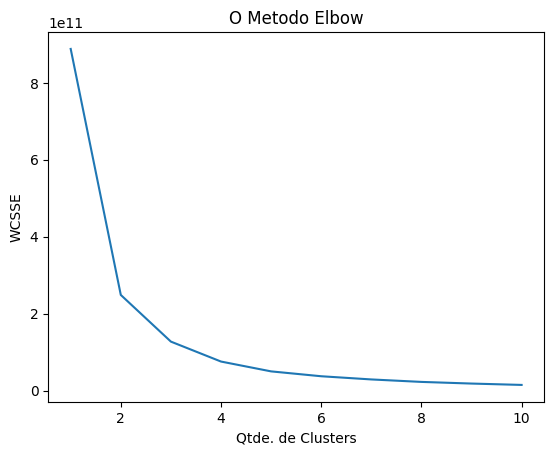

In [461]:
# Cálculo do WCSSE - Within Cluster Sum of Squared Errors
wcsse = []
maxclusters = 11
for i in range(1, maxclusters):
  kmeans = KMeans(n_clusters = i, init = 'random')
  kmeans.fit(df)
  print (i,kmeans.inertia_)
  wcsse.append(kmeans.inertia_)

plt.plot(range(1, maxclusters), wcsse)
plt.title('O Metodo Elbow')
plt.xlabel('Qtde. de Clusters')
plt.ylabel('WCSSE') # Within Cluster Sum of Squares
plt.show()

In [473]:
kmeans = KMeans(n_clusters = 4, init = 'random')
kmeans.fit(df)

KMeans(init='random', n_clusters=4)

In [474]:
print('Groups:  ', len(kmeans.cluster_centers_.tolist()))
print('Columns: ', len(kmeans.cluster_centers_.tolist()[0]))

Groups:   4
Columns:  8


In [480]:
groups = pd.Series(kmeans.labels_).unique().tolist()
groups

[2, 3, 0, 1]

In [481]:
print("Column indexes")
for i in range(len(df.columns)):
  print('#', i, '\t', df.columns.tolist()[i])

Column indexes
# 0 	 Income
# 1 	 Dependents
# 2 	 Age
# 3 	 Partner
# 4 	 Education_level
# 5 	 TotalMntSpent
# 6 	 TotalAcceptedCmps
# 7 	 TotalNumPurchases


In [484]:
df = df.reset_index(drop=True)
labels = kmeans.labels_

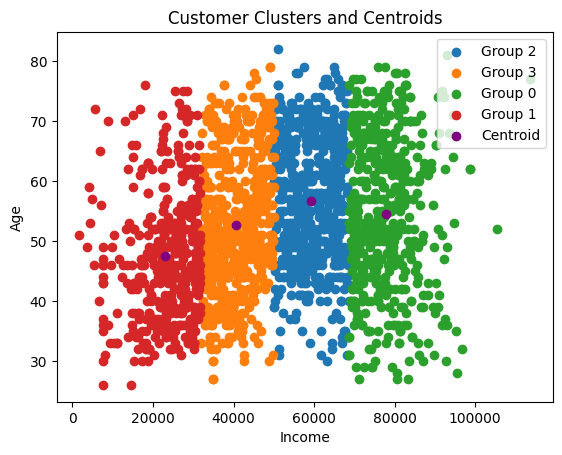

In [499]:
col_x = 0 # Income
col_y = 2 # Age

for group in groups:
  plt.scatter(
    df[pd.Series(labels) == group].values[:, col_x],
    df[pd.Series(labels) == group].values[:, col_y],
    label=("Group " + str(group))
  )

plt.scatter(
  kmeans.cluster_centers_[:, col_x],   
  kmeans.cluster_centers_[:, col_y], 
  c = 'purple',
  label="Centroid"
)

plt.legend()
plt.title('Customer Clusters and Centroids')
plt.xlabel(df.columns.tolist()[col_x])
plt.ylabel(df.columns.tolist()[col_y])
plt.show()

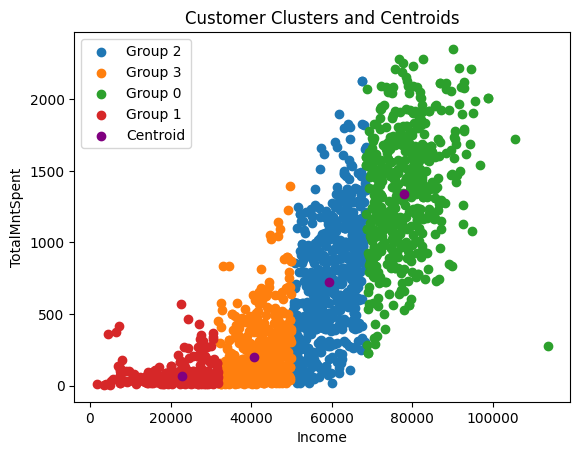

In [500]:
col_x = 0 # Income
col_y = 5 # TotalMntSpent

for group in groups:
  plt.scatter(
    df[pd.Series(labels) == group].values[:, col_x],
    df[pd.Series(labels) == group].values[:, col_y],
    label=("Group " + str(group))
  )

plt.scatter(
  kmeans.cluster_centers_[:, col_x],   
  kmeans.cluster_centers_[:, col_y], 
  c = 'purple',
  label="Centroid"
)

plt.legend()
plt.title('Customer Clusters and Centroids')
plt.xlabel(df.columns.tolist()[col_x])
plt.ylabel(df.columns.tolist()[col_y])
plt.show()

In [501]:
clustered_df = df
clustered_df['group'] = labels
clustered_df

,Income,Dependents,Age,Partner,Education_level,TotalMntSpent,TotalAcceptedCmps,TotalNumPurchases,group
0,58138.0,0,65,0,2,1617,1,25,2
1,46344.0,2,68,0,2,27,0,6,3
2,71613.0,0,57,1,2,776,0,21,0
3,26646.0,1,38,1,2,53,0,8,1
4,58293.0,1,41,1,4,422,0,19,2
...,...,...,...,...,...,...,...,...,...
2149,61223.0,1,55,1,2,1341,0,18,2
2150,64014.0,3,76,1,4,444,1,22,2
2151,56981.0,0,41,0,2,1241,1,19,2
2152,69245.0,1,66,1,3,843,0,23,0


In [510]:
description = clustered_df.groupby("group")[relevantFeatures]
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
description

,Income,Dependents,Age,Partner,Education_level,TotalMntSpent,TotalAcceptedCmps,TotalNumPurchases,n_clients
group,,,,,,,,,
0,77900.296000,0.374000,54.490000,0.638000,2.444000,1336.362000,0.764000,20.836000,500
1,22941.354023,0.990805,47.397701,0.652874,1.931034,68.751724,0.177011,7.234483,435
2,59407.339496,1.065546,56.653782,0.670588,2.564706,721.907563,0.304202,19.300840,595
3,40718.081731,1.326923,52.756410,0.623397,2.506410,199.887821,0.250000,10.668269,624
